**Hello World Example**

_This notebook is heavily based on Chapter 3 of Aurelien Geron: Hand-on Machine Learning with Scikit-learn & Tensorflow._

# Setup

First, let's make sure this notebook works well in both python 2 and 3, import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures:

In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
NB_ID = "sevens"

# create the directory if it does not exist
os.makedirs(os.path.join(PROJECT_ROOT_DIR, "images", NB_ID), exist_ok = True)
        
def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", NB_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

# MNIST

MNIST is the hello world example of machine learning. scikit-learn can load the data directly from http://mldata.org. 

In [2]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')

Find out the format the data.  

In [3]:
mnist

{'DESCR': 'mldata.org dataset: mnist-original',
 'COL_NAMES': ['label', 'data'],
 'target': array([0., 0., 0., ..., 9., 9., 9.]),
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)}

Seems to be a dictionary with a data array and a target or label vector as an array with the following sizes. 

In [4]:
# Use the notion of y=f(X)
X, y = mnist["data"], mnist["target"]
print('Data size: {0} x {1} and label size {2}'.format(X.shape[0],X.shape[1],y.shape[0]))

Data size: 70000 x 784 and label size 70000


70,000 examples of images with 784 pixels. These are square:

In [5]:
import math
print('The images are of size: {0} x {0}'.format(math.sqrt(X.shape[1])))

The images are of size: 28.0 x 28.0


We can use the matplotlib library to plot the image as a grayscale image with pyplot. Let's find images labeled 7.   

There are 7293 images that are labeled 7
Saving figure digit_7_plot


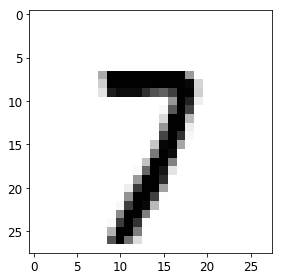

In [6]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

index7 = np.where(y==7)[0]
print('There are {0} images that are labeled 7'.format(index7.shape[0]))

# randomly pick an image
pick = index7[np.random.choice(index7.shape[0])]
digit_7 = X[pick,:]
# reshape into a matrix
digit_7_image = digit_7.reshape(28, 28)
plt.imshow(digit_7_image, cmap = matplotlib.cm.binary,
           interpolation="nearest")
# plt.axis("on")
# print to file
save_fig("digit_7_plot")
plt.show()

Function by Aurelien Geron to plot sample images in a matrix. Note that the indicies are hard-coded meaning that he is relying on the ordering of the dataset.

In [7]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = matplotlib.cm.binary,
               interpolation="nearest")
    plt.axis("off")

In [8]:
# EXTRA
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")

Saving figure more_digits_plot


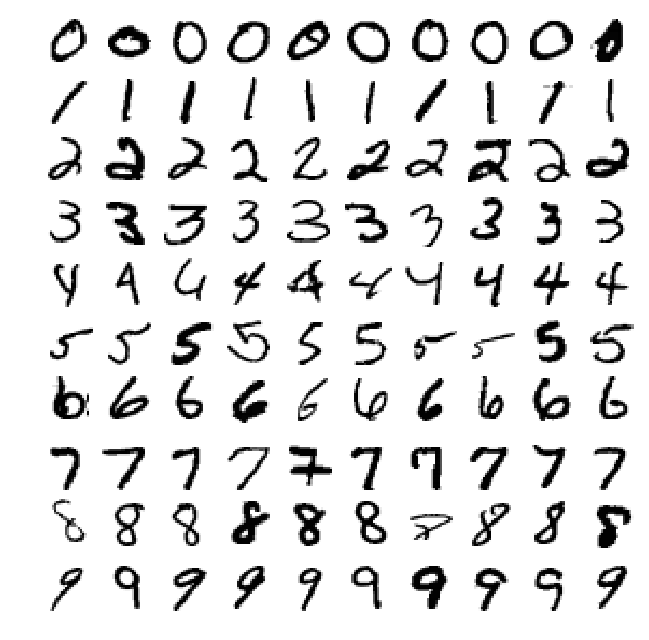

In [9]:
plt.figure(figsize=(9,9))
example_images = np.r_[X[:12000:600], X[13000:30600:600], X[30600:60000:590]]
plot_digits(example_images, images_per_row=10)
save_fig("more_digits_plot")
plt.show()

# Test and Training Data

Split data into test and training data after re-shuffling the data. We can simply take the first 60000 as training and the last 10000 as test.

In [10]:
shuffle_index = np.random.permutation(70000)
# reshuffle the data and use 60000 samples as training and 10000 as test
X_train, X_test, y_train, y_test = X[shuffle_index[:60000],:], X[shuffle_index[60000:],:], y[shuffle_index[:60000]], y[shuffle_index[60000:]]


# Binary classifier

Set up a binary classifier for 7 and not 7. We create new labels which are true meaning we have a 7 and false meaning we do not have a 7. 

In [39]:
y_train_7 = (y_train == 7)
y_test_7 = (y_test == 7)
print('We have a training set with {0} images of 7, and a test set with {1}'.format(sum(y_train_7),sum(y_test_7)))


[ True False False ... False False False]
We have a training set with 6251 images of 7, and a test set with 1042


In [12]:
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression

bin_clf = LogisticRegression(max_iter=5)
# sgd_clf = SGDClassifier(max_iter=5, random_state=42)
bin_clf.fit(X_train, y_train_7)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=5, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Let's pick a 7 out of the training set and see what our classifier predicts.

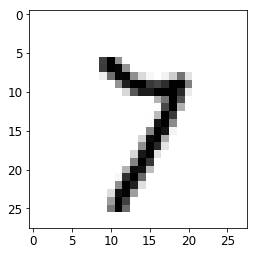

Classifier prediction is [ True] that the image is a 7


In [13]:
index7 = np.where(y_train==7)[0]
# randomly pick an image again
pick = index7[np.random.choice(index7.shape[0])]
digit_7 = X_train[pick,:]
# reshape into a matrix
digit_7_image = digit_7.reshape(28, 28)
plt.imshow(digit_7_image, cmap = matplotlib.cm.binary,
           interpolation="nearest")
# plt.axis("on")
plt.show()

print('Classifier prediction is {0} that the image is a 7'.format(bin_clf.predict([digit_7])))

Let's calculate accuracy

In [41]:
from sklearn.metrics import accuracy_score

y_pred = bin_clf.predict(X_train)
print('Classifier accuracy on the training set is {0} '.format(accuracy_score(y_train_7, y_pred)))

[ True False False ... False False False]
[ True False False ... False False False]
Classifier accuracy on the training set is 0.98345 


In [15]:
from sklearn.base import BaseEstimator
class Never7Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

Our data set is not balanced, i.e., we can create a simple classifier which always predict not a 7 and it wouldn't be so bad.

In [16]:
never_7_clf = Never7Classifier()
y_pred_never = never_7_clf.predict(X_train)
print('Classifier accuracy on the training set is {0} '.format(accuracy_score(y_train_7, y_pred_never)))

Classifier accuracy on the training set is 0.8958166666666667 


Let's calculate precision, recall and the f1 score; easy to crunch numbers ourselves but its built in.

In [17]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

print('Classifier scores on training set: ')
print('Precision is {0} '.format(precision_score(y_train_7, y_pred)))
print('Recall is {0} '.format(recall_score(y_train_7, y_pred)))
print('F1 is {0} '.format(f1_score(y_train_7, y_pred)))

print( 'And the confusion matrix: \n {0}'.format(confusion_matrix(y_train_7, y_pred) ))

Classifier scores on training set: 
Precision is 0.9400736524941413 
Recall is 0.8984162533994561 
F1 is 0.9187730061349693 
And the confusion matrix: 
 [[53391   358]
 [  635  5616]]


Just to be clear let's look at the confusion matrix for the never 7 classifier.

In [18]:
print(confusion_matrix(y_train_7, y_pred_never))

[[53749     0]
 [ 6251     0]]


In [19]:
from sklearn.model_selection import cross_val_score
cross_val_score(bin_clf, X_train, y_train_7, cv=3, scoring="accuracy")

array([0.98300085, 0.9839    , 0.98154908])

This is how Aurelien Geron suggest we could implement cross-validation with stratified sampling ourselves. Note it produces the same as above.

In [20]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, random_state=42)

for train_index, test_index in skfolds.split(X_train, y_train_7):
    clone_clf = clone(bin_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = (y_train_7[train_index])
    X_test_fold = X_train[test_index]
    y_test_fold = (y_train_7[test_index])

    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

0.9830008499575021
0.9839
0.9815490774538727


Text(0,0.5,'Count')

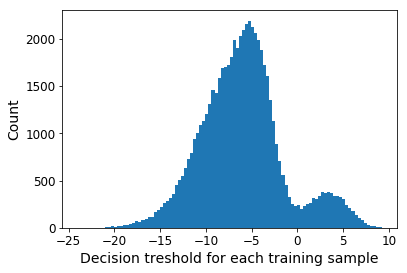

In [21]:
from sklearn.model_selection import cross_val_predict

y_scores = cross_val_predict(bin_clf, X_train, y_train_7, cv=3,
                             method="decision_function")
n, bins, patches = plt.hist(y_scores, 100)

plt.xlabel('Decision treshold for each training sample')
plt.ylabel('Count')


Note by Aurelien Geron: there was an [issue](https://github.com/scikit-learn/scikit-learn/issues/9589) in Scikit-Learn 0.19.0 (fixed in 0.19.1) where the result of `cross_val_predict()` was incorrect in the binary classification case when using `method="decision_function"`, as in the code above. The resulting array had an extra first dimension full of 0s. Just in case you are using 0.19.0, we need to add this small hack to work around this issue:

In [22]:
# hack to work around issue #9589 in Scikit-Learn 0.19.0
if y_scores.ndim == 2:
    y_scores = y_scores[:, 1]

In [23]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_7, y_scores)

Saving figure precision_recall_vs_threshold_plot


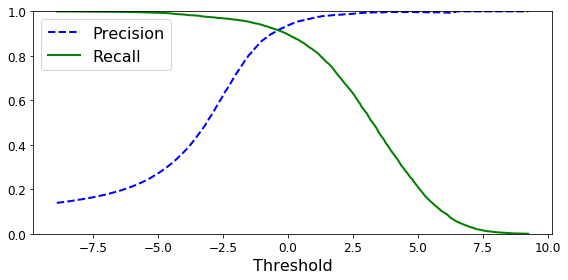

In [24]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.xlabel("Threshold", fontsize=16)
    plt.legend(loc="upper left", fontsize=16)
    plt.ylim([0, 1])

plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
save_fig("precision_recall_vs_threshold_plot")
plt.show()

Saving figure precision_vs_recall_plot


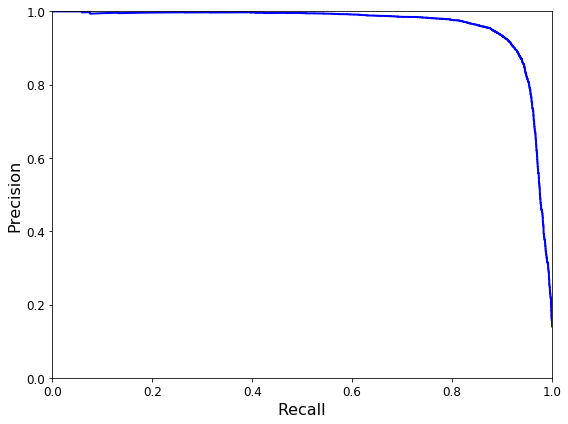

In [25]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
save_fig("precision_vs_recall_plot")
plt.show()

# ROC curves

In [26]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_7, y_scores)

Saving figure roc_curve_plot


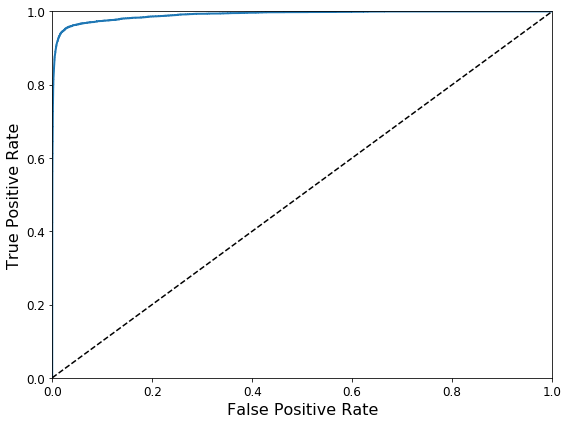

In [27]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
save_fig("roc_curve_plot")
plt.show()

# Multiclass classification

Scikit-learn tutorial states: "The classes SGDClassifier and SGDRegressor provide functionality to fit linear models for classification and regression using different (convex) loss functions and different penalties. E.g., with loss="log", SGDClassifier fits a logistic regression model, while with loss="hinge" it fits a linear support vector machine (SVM)."

In [43]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=5, random_state=42)
sgd_clf.fit(X_train, y_train)
print(X_train.shape)

(60000, 784)


In [29]:
print('Classifier prediction is that the image belongs to class {0}'.format(sgd_clf.predict([digit_7])))

Classifier prediction is that the image belongs to class [7.]


In [30]:
from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier(max_iter=5, random_state=42))
ovo_clf.fit(X_train, y_train)

OneVsOneClassifier(estimator=SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=5, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False),
          n_jobs=1)

In [31]:
print('Classifier prediction is that the image belongs to class {0}'.format(ovo_clf.predict([digit_7])))

Classifier prediction is that the image belongs to class [7.]


In [32]:
print('Number of classifiers needed for one-vs-one 10*9/2={0}'.format(len(ovo_clf.estimators_)))

Number of classifiers needed for one-vs-one 10*9/2=45


In [33]:
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train, cv=3)


In [34]:
conf_mx = confusion_matrix(y_train, y_train_pred)
print('Confusion matrix: \n{0}'.format(conf_mx))

Confusion matrix: 
[[5421    3   78   30   10  105   36   40   99   52]
 [   1 6380   68   59    7   67    6   11   79   39]
 [  25   71 5265  122   58   79   68  109  183   46]
 [  13   28  320 4911    2  380   21   83  129  201]
 [  12   16   52   26 4660   60   48   86   93  800]
 [  34   36   66  270   40 4537   70   44  170  136]
 [  31   34   87    3   39  269 5331   29   51   26]
 [  10   22   91   24   31   16    4 5478   33  542]
 [  22  198  486  268   64  797   49  128 3638  249]
 [  19   23   38  160  137   71    4  560   43 4934]]


In [35]:
def plot_confusion_matrix(matrix):
    """If you prefer color and a colorbar"""
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    cax = ax.matshow(matrix)
    fig.colorbar(cax)

Saving figure confusion_matrix_plot


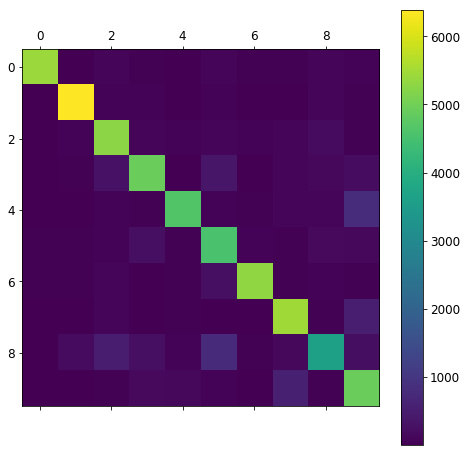

In [36]:
# plt.matshow(conf_mx, cmap=plt.cm.gray)
plot_confusion_matrix(conf_mx)
save_fig("confusion_matrix_plot", tight_layout=False)
plt.show()

Make errors more visible by printing the ratio and zeroing out the diagonal.

Saving figure confusion_matrix_errors_plot


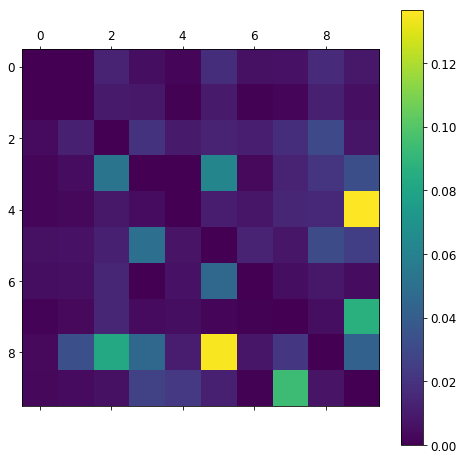

In [37]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums
np.fill_diagonal(norm_conf_mx, 0)
# plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plot_confusion_matrix(norm_conf_mx)
save_fig("confusion_matrix_errors_plot", tight_layout=False)
plt.show()

# Confusion matrix samples
Print examples for the confusion between 3 and 5

Saving figure error_analysis_digits_plot


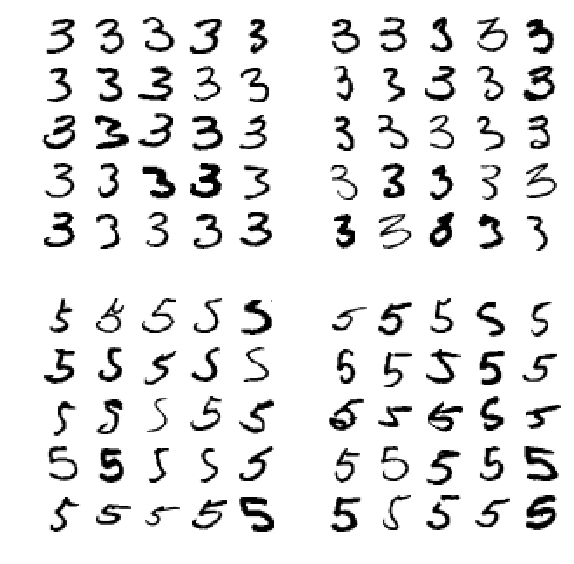

In [38]:
cl_a, cl_b = 3, 5
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
save_fig("error_analysis_digits_plot")
plt.show()